In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

### Loading the dataset

In [2]:
df = pd.read_csv('Mall_Customers.csv',header=0,index_col=0)

In [4]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


### Exploring datset

In [4]:
df.shape

(200, 4)

In [5]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [7]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
df.describe(include="all")

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200,200.000000,200.000000,200.000000
unique,2,NaN,NaN,NaN
top,Female,NaN,NaN,NaN
freq,112,NaN,NaN,NaN
mean,NaN,38.850000,60.560000,50.200000
std,NaN,13.969007,26.264721,25.823522
min,NaN,18.000000,15.000000,1.000000
25%,NaN,28.750000,41.500000,34.750000
50%,NaN,36.000000,61.500000,50.000000
75%,NaN,49.000000,78.000000,73.000000


### Data-Visualization

In [11]:
# Loading essential libraries
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Count')

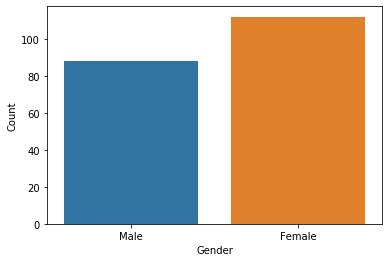

In [12]:
#Gender plot
# Visualising the columns 'Gender' using Countplot
sns.countplot(x='Gender', data=df)
plt.xlabel('Gender')
plt.ylabel('Count')


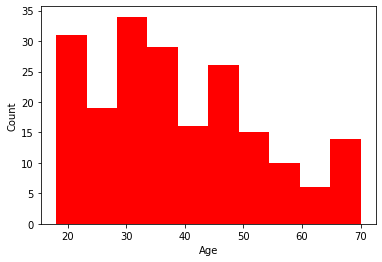

In [23]:
# Visualising the columns 'Age' using Histogram
plt.hist(x=df['Age'], bins=10, orientation='vertical', color='red')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()
#From the Histogram it is evident that there are 3 age groups that are more frequently shop at the mall,
#they are: 15-22 years, 30-40 years and 45-50 years.

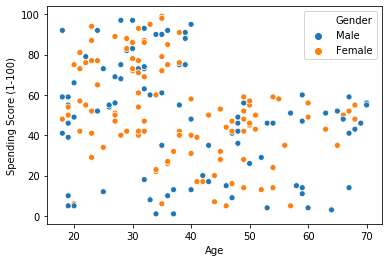

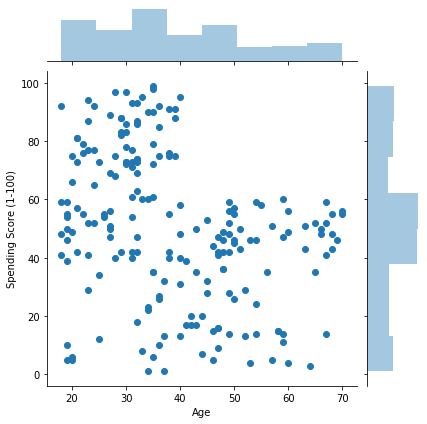

In [24]:
# Visualising the columns 'Age', 'Spending Score (1-100)' using Scatterplot and Jointplot
sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)', hue='Gender')
sns.jointplot(data=df, x='Age', y='Spending Score (1-100)')

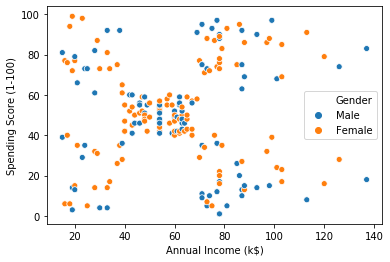

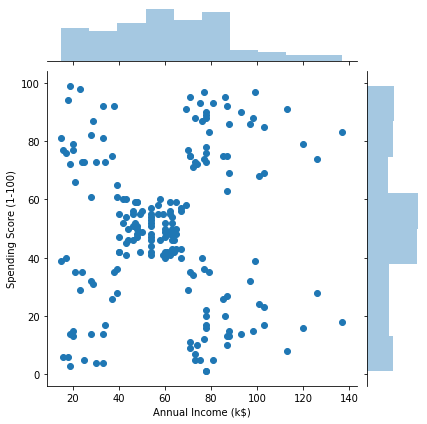

In [25]:
# Visualising the columns 'Annual Income (k$)', 'Spending Score (1-100)' using Scatterplot and Jointplot
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender')
sns.jointplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)')

In [13]:
x=df.values[:,[2,3]]

### Using Elbow method finding optimal no. of clusters

In [15]:
from sklearn.cluster import KMeans

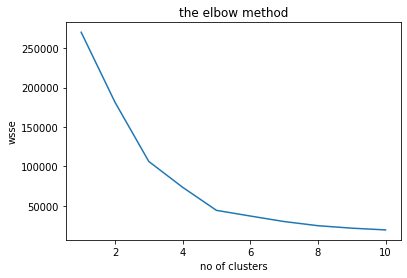

In [16]:
wsse = []
for i in range(1,11):
    kmean = KMeans(n_clusters = i,random_state=10)
    kmean.fit(x)
    wsse.append(kmean.inertia_)
    
plt.plot(range(1,11),wsse)
plt.title('the elbow method')
plt.xlabel('no of clusters')
plt.ylabel('wsse')
plt.show()

In [17]:
kmeans = KMeans(n_clusters = 5,random_state=10)
y_pred = kmeans.fit_predict(x)

In [18]:
y_pred

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 2, 1, 2, 4, 2, 4, 2,
       1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2])

In [19]:
kmeans.n_iter_

5

In [20]:
df['clusters']=y_pred
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters
CustomerID,,,,,
1,Male,19,15,39,3
2,Male,21,15,81,0
3,Female,20,16,6,3
4,Female,23,16,77,0
5,Female,31,17,40,3


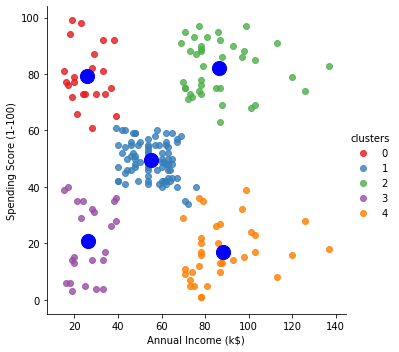

In [21]:
import seaborn as sns
sns.lmplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)',
          fit_reg=False,hue='clusters',palette='Set1')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=200, color='blue')
plt.show()

In [26]:
#print(list(zip(plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=200, color='blue')
#)))

In [27]:
kmeans.cluster_centers_

array([[25.72727273, 79.36363636],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [88.2       , 17.11428571]])

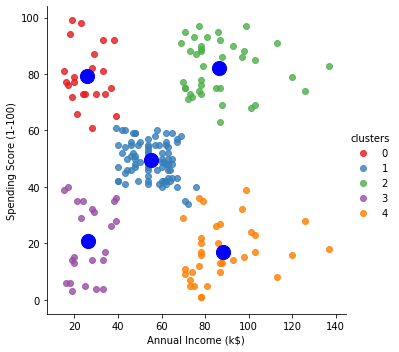

In [28]:
import seaborn as sns
sns.lmplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)',
          fit_reg=False,hue='clusters',palette='Set1')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=200, color='blue')
plt.show()

In [ ]:
df['clusters']=df.clusters.map({0:'careless',
                                1:'standard',
                                2:'Target',
                                3:'sensible',
                                4:'careful'})

In [ ]:
df

In [ ]:
new_df=df[df.clusters=="Target"]

In [ ]:
new_df